In [14]:
import os
import json
import csv

cls_set = set()

train_dir = "train"
csv_path = "imagenet_train.csv"
class_index_file = "imagenet_class_index.json"

# 加载 WordNet ID 到 label 名称映射
with open(class_index_file, 'r') as f:
    class_idx = json.load(f)

# 创建一个从 wnid 到 类别名 的映射字典
wnid_to_label = {v[0]: v[1] for k, v in class_idx.items()}

image_data = []
img_id = 0


for wnid in sorted(os.listdir(train_dir)):
    label_folder = os.path.join(train_dir, wnid)
    if not os.path.isdir(label_folder):
        continue

    label_name = wnid_to_label.get(wnid, "unknown")  # 如果找不到，保留原始 ID
    cls_set.add(label_name)

    for img_file in os.listdir(label_folder):
        if img_file.lower().endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(train_dir, wnid, img_file)
            image_data.append([img_id, img_path, label_name])
            img_id += 1

# 写入 CSV 文件
with open(csv_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["id", "image_path", "label"])
    writer.writerows(image_data)

print(f"CSV 文件已生成：{csv_path}，共 {len(image_data)} 张图片")


CSV 文件已生成：imagenet_train.csv，共 1281167 张图片


In [16]:
cls_set

{'Afghan_hound',
 'African_chameleon',
 'African_crocodile',
 'African_elephant',
 'African_grey',
 'African_hunting_dog',
 'Airedale',
 'American_Staffordshire_terrier',
 'American_alligator',
 'American_black_bear',
 'American_chameleon',
 'American_coot',
 'American_egret',
 'American_lobster',
 'Angora',
 'Appenzeller',
 'Arabian_camel',
 'Arctic_fox',
 'Australian_terrier',
 'Band_Aid',
 'Bedlington_terrier',
 'Bernese_mountain_dog',
 'Blenheim_spaniel',
 'Border_collie',
 'Border_terrier',
 'Boston_bull',
 'Bouvier_des_Flandres',
 'Brabancon_griffon',
 'Brittany_spaniel',
 'CD_player',
 'Cardigan',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'Christmas_stocking',
 'Crock_Pot',
 'Dandie_Dinmont',
 'Doberman',
 'Dungeness_crab',
 'Dutch_oven',
 'Egyptian_cat',
 'English_foxhound',
 'English_setter',
 'English_springer',
 'EntleBucher',
 'Eskimo_dog',
 'European_fire_salamander',
 'European_gallinule',
 'French_bulldog',
 'French_horn',
 'French_loaf',
 'German_shepherd',
 'German_s

In [8]:
import os
import csv
import json
import re

val_dir = "val"
class_index_json = "imagenet_class_index.json"
csv_output = "imagenet_val.csv"

cls_set = set()
# 加载 ImageNet class index
with open(class_index_json, "r") as f:
    class_idx = json.load(f)

# index -> label_name
index_to_label = {int(k): v[1] for k, v in class_idx.items()}

# 提取图片编号，并排序（以确保一致）
image_files = sorted([
    f for f in os.listdir(val_dir)
    if f.lower().endswith((".jpeg", ".jpg", ".png"))
])

data = []

for i, filename in enumerate(image_files):
    match = re.search(r"(\d{8})", filename)
    if not match:
        continue

    img_num = int(match.group(1))  # 如 00000002 -> 2
    label_idx = img_num - 1        # 转为 0-based index
    label_name = index_to_label.get(label_idx, f"unknown_{label_idx}")
    cls_set.add(label_name)
    image_path = os.path.join(val_dir, filename)
    data.append([i, image_path, label_name])

# 保存为 CSV
with open(csv_output, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["id", "image_path", "label"])
    writer.writerows(data)

print(f"已生成 {csv_output}，共 {len(data)} 条记录")


已生成 imagenet_val.csv，共 50000 条记录


In [10]:
len(cls_set)

999

In [17]:
cls_set

{'Afghan_hound',
 'African_chameleon',
 'African_crocodile',
 'African_elephant',
 'African_grey',
 'African_hunting_dog',
 'Airedale',
 'American_Staffordshire_terrier',
 'American_alligator',
 'American_black_bear',
 'American_chameleon',
 'American_coot',
 'American_egret',
 'American_lobster',
 'Angora',
 'Appenzeller',
 'Arabian_camel',
 'Arctic_fox',
 'Australian_terrier',
 'Band_Aid',
 'Bedlington_terrier',
 'Bernese_mountain_dog',
 'Blenheim_spaniel',
 'Border_collie',
 'Border_terrier',
 'Boston_bull',
 'Bouvier_des_Flandres',
 'Brabancon_griffon',
 'Brittany_spaniel',
 'CD_player',
 'Cardigan',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'Christmas_stocking',
 'Crock_Pot',
 'Dandie_Dinmont',
 'Doberman',
 'Dungeness_crab',
 'Dutch_oven',
 'Egyptian_cat',
 'English_foxhound',
 'English_setter',
 'English_springer',
 'EntleBucher',
 'Eskimo_dog',
 'European_fire_salamander',
 'European_gallinule',
 'French_bulldog',
 'French_horn',
 'French_loaf',
 'German_shepherd',
 'German_s

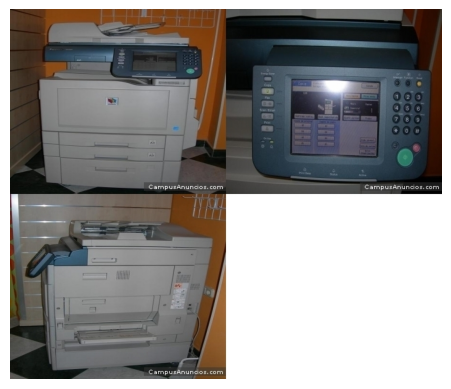

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 图像路径
img_path = "val/ILSVRC2012_val_00024977.JPEG"

# 读取并显示图像
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # 不显示坐标轴
plt.show()


In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 图像路径
img_path = "train/n00024977/n00024977_10957.JPEG"

# 读取并显示图像
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # 不显示坐标轴
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'train/n00024977/n00024977_10957.JPEG'